# Projeto 1 - Análise e limpeza de dados

## Importações e leitura do dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_athlete_events.csv to df_athlete_events.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['df_athlete_events.csv']))

In [ ]:
df.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


Já foi possível ter uma visão geral do dataset e perceber que o peso precisa ser trabalhado, por estar apresentado como "object", sendo que o peso é apenas numérico.

## Limpeza do dataset

### Variáveis Categóricas

In [ ]:
df.describe(include=['object'])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


A coluna de Gênero possui 6 valores únicos, portanto ja é possível notar que ela precisará ser limpa. Da mesma forma, a coluna de Estação precisará ser limpa por apresentar 5 valores únicos, além disso precisamos verificar qual é o valor a mais na coluna de Medalha

#### Gênero

In [ ]:
pd.Series(df.Sex.unique())

0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object

In [ ]:
df[df['Sex'] == 'Vic vai te dar um socao'].head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
21,30,Pepijn Aardewijn,Vic vai te dar um socao,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
131,562,Pawe Abratkiewicz,Vic vai te dar um socao,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,NaN
227,963,Derrick Ralph Adkins,Vic vai te dar um socao,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold
355,1435,Janne Petteri Ahonen,Vic vai te dar um socao,28.0,184.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
404,1555,Geard Ajetovi,Vic vai te dar um socao,19.0,170.0,67.0,Serbia and Montenegro,SCG,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN


In [ ]:
df[df['Sex'] == 'P&D >> Comunidade'].head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
365,1467,Mara Magdalena Aicega Amicarelli,P&D >> Comunidade,34.0,165.0,60.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Bronze
399,1546,Eirini Andili,P&D >> Comunidade,17.0,167.0,45.0,Greece,GRE,2000 Summer,2000,Summer,Sydney,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Bronze
432,1639,Albina Khamitovna Akhatova,P&D >> Comunidade,29.0,160.0,55.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,Gold
496,2210,Marina Alabau Neira,P&D >> Comunidade,26.0,164.0,55.0,Spain,ESP,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Windsurfer,Gold
552,2464,Jo Qesem Ayela Aleh,P&D >> Comunidade,30.0,171.0,58.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's Two Person Dinghy,Silver


Pelos nomes dos atletas e com uma breve pesquisa, é possível fazer uma generalização: os valores que são iguais a "Vic vai te dar um socao" referem-se ao gênero masculino, e os valores que são iguais a "P&D >> Comunidade" referem-se ao gênero feminino.

In [ ]:
df['Sex'].replace('M', 'Male', inplace=True)
df['Sex'].replace('F', 'Female', inplace=True)
df['Sex'].replace('MALE', 'Male', inplace=True)
df['Sex'].replace('FEMALE', 'Female', inplace=True)

Substituimos os valores para definir um padrão para facilitar nossa análise e também para fins estéticos.

In [ ]:
print(len(df[df['Sex'] == 'Vic vai te dar um socao']))
print(len(df[df['Sex'] == 'P&D >> Comunidade']))

312
333


In [ ]:
df['Sex'].replace('Vic vai te dar um socao', 'Male', inplace=True)
df['Sex'].replace('P&D >> Comunidade', 'Female', inplace=True)

#### Time

In [ ]:
print(np.sort(df.Team.unique())[0:10])
print(np.sort(df.Team.unique())[-10:-1])

['#ForaBolsonaro' 'A North American Team' 'Afghanistan' 'Alain IV'
 'Albania' 'Algeria' 'Ali-Baba II' 'Amateur Athletic Association'
 'Amstel Amsterdam' 'Ancora']
['Widgeon' 'Willem-Six' 'Winnipeg Shamrocks-1' 'Xantippa' 'Yemen'
 'Yeoman V' 'Yugoslavia' 'Zambia' 'Zimbabwe']


Pelo fato de existirem muitos valores para times, optei por analisar somente os valores iniciais e os valores finais em ordem alfabética, apenas para verificar se há erros de caracteres, e com isso nota-se que há um valor que precisa ser retirado da lista (~~e o Bolsonaro também precisa ser retirado de todos os lugares possiveis~~).

In [ ]:
df[df['Team'] == '#ForaBolsonaro']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1141,4359,va Angyal,Female,21.0,163.0,63.0,#ForaBolsonaro,HUN,1976 Summer,1976,#ForaBolsonaro,Montreal,Handball,Handball Women's Handball,Bronze
1701,6299,Yelena Yuryevna Azarova,Female,31.0,165.0,64.0,#ForaBolsonaro,RUS,2004 Summer,2004,#ForaBolsonaro,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
2626,9250,Gudrun Beckmann,Female,17.0,174.0,62.0,#ForaBolsonaro,FRG,1972 Summer,1972,#ForaBolsonaro,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
3232,11047,"Janice ""Jan"" Betker",Female,37.0,167.0,64.0,#ForaBolsonaro,CAN,1998 Winter,1998,#ForaBolsonaro,Nagano,Curling,Curling Women's Curling,Gold
3583,12054,Bonnie Kathleen Blair (-Cruikshank),Female,29.0,165.0,59.0,#ForaBolsonaro,USA,1994 Winter,1994,#ForaBolsonaro,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43848,130667,Serena Jamika Williams,Female,30.0,175.0,70.0,#ForaBolsonaro,USA,2012 Summer,2012,#ForaBolsonaro,######,Tennis,Tennis Women's Doubles,Gold
43891,130759,"Helen Newington Wills (-Moody, -Roark)",Female,18.0,NaN,NaN,#ForaBolsonaro,USA,1924 Summer,1924,#ForaBolsonaro,Paris,Tennis,Tennis Women's Singles,Gold
44051,131184,"Jeanette Josephina Maria ""Nettie"" Witziers-Timmer",Female,25.0,NaN,NaN,#ForaBolsonaro,NED,1948 Summer,1948,#ForaBolsonaro,London,Athletics,Athletics Women's 4 x 100 metres Relay,Nelson
44531,132574,Yang Yun,Female,15.0,158.0,40.0,#ForaBolsonaro,CHN,2000 Summer,2000,#ForaBolsonaro,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,Bronze


Com essa breve visualização para verificar se há padrões relacionados a esse "time" podemos perceber que a coluna Estação também possui esse valores e a coluna Cidade possui um valor divergente que alteraremos posteriormente.

In [ ]:
df['Team'].replace('#ForaBolsonaro', 'No data', inplace=True)

Como não foram verificados padrões, optei por apenas mudar o valor para posteriormente alterar todos esses respectivos valores do dataframe para NaN.

#### Cidade

In [ ]:
df.City.unique()

array(['Paris', 'Albertville', 'Antwerpen', 'Sochi', 'London', 'Helsinki',
       'Lillehammer', 'Salt Lake City', 'Torino', 'Beijing', 'Seoul',
       'Atlanta', 'Oslo', 'Squaw Valley', 'Stockholm', 'Melbourne',
       'Rio de Janeiro', 'Sydney', 'Athina', 'Moskva', 'Los Angeles',
       'Barcelona', 'Berlin', 'Tokyo', 'Roma', 'Munich', 'Chamonix',
       'St. Louis', 'Sankt Moritz', 'Nagano', 'Calgary', 'Grenoble',
       'Montreal', 'Vancouver', 'Amsterdam', 'Mexico City', 'Sapporo',
       'Lake Placid', 'Sarajevo', 'Garmisch-Partenkirchen',
       "Cortina d'Ampezzo", 'Innsbruck', '######'], dtype=object)

In [ ]:
len(df[df['City'] == '######'])

134

In [ ]:
df_hashtags = df[df['City'] == '######']
df_hashtags.head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1565,5815,"Gillian ""Jill"" Atkins",Female,29.0,165.0,65.0,Great Britain,GBR,1992 Summer,1992,Summer,######,Hockey,Hockey Women's Hockey,Bronze
2158,7903,Jane Louise Barkman (-Brown),Female,17.0,169.0,61.0,United States,USA,1968 Summer,1968,Summer,######,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold
3016,10360,Liubov Ivanivna Berezhna-Odynokova,Female,20.0,167.0,61.0,Soviet Union,URS,1976 Summer,1976,Summer,######,Handball,Handball Women's Handball,Gold
3211,10955,Annemieke Marileen Bes,Female,30.0,177.0,70.0,Netherlands,NED,2008 Summer,2008,Summer,######,Sailing,Sailing Women's Three Person Keelboat,Silver
3435,11671,"Suzanne Brigit ""Sue"" Bird",Female,35.0,175.0,66.0,United States,USA,2016 Summer,2016,Summer,######,Basketball,Basketball Women's Basketball,Gold


In [ ]:
for ind, row in df_hashtags.iterrows():
    df_same_games = df[df['Games'] == df.loc[ind, 'Games']]
    df.loc[ind, 'City'] = df_same_games['City'].mode()[0]

df.loc[[1565]]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1565,5815,"Gillian ""Jill"" Atkins",Female,29.0,165.0,65.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Hockey,Hockey Women's Hockey,Bronze


Para a mudança dos valores da cidade, foi utilizado um método um pouco mais sofisticado do que os utilizados anteriormente, iterando por cada linha onde o valor da cidade era "######".

Esse método foi possível, pois a partir do ano podemos saber em qual cidade aquela olimpíada se passou através do próprio dataframe, já que foram somente 134 valores modificados. A partir disso, foi calculada a moda das cidades de um determinado ano, e fazendo uma manipulação de string foi possível substituir os valores.

#### Estação

In [ ]:
pd.Series(df.Season.unique())

0            Summer
1            Winter
2    #ForaBolsonaro
3         Ele nunca
4           Ele não
dtype: object

In [ ]:
df_elenao = df[(df['Season'] == '#ForaBolsonaro') | (df['Season'] == 'Ele nunca') | (df['Season'] == 'Ele não')]
df_elenao

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1141,4359,va Angyal,Female,21.0,163.0,63.0,No data,HUN,1976 Summer,1976,#ForaBolsonaro,Montreal,Handball,Handball Women's Handball,Bronze
1701,6299,Yelena Yuryevna Azarova,Female,31.0,165.0,64.0,No data,RUS,2004 Summer,2004,#ForaBolsonaro,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
2371,8590,Suzy Batkovic (-Brown),Female,23.0,195.0,89.0,Australia,AUS,2004 Summer,2004,Ele nunca,Athina,Basketball,Basketball Women's Basketball,Silver
2568,9111,Anna Rose Bebington-Watkins,Female,25.0,183.0,78.0,Great Britain,GBR,2008 Summer,2008,Ele não,Beijing,Rowing,Rowing Women's Double Sculls,Bronze
2626,9250,Gudrun Beckmann,Female,17.0,174.0,62.0,No data,FRG,1972 Summer,1972,#ForaBolsonaro,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44051,131184,"Jeanette Josephina Maria ""Nettie"" Witziers-Timmer",Female,25.0,NaN,NaN,No data,NED,1948 Summer,1948,#ForaBolsonaro,London,Athletics,Athletics Women's 4 x 100 metres Relay,Nelson
44531,132574,Yang Yun,Female,15.0,158.0,40.0,No data,CHN,2000 Summer,2000,#ForaBolsonaro,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
44952,133869,Yelena Mikhaylovna Zamolodchikova,Female,17.0,154.0,43.0,Russia,RUS,2000 Summer,2000,Ele não,Sydney,Gymnastics,Gymnastics Women's Floor Exercise,Gold
45102,134290,Heidi Zeller-Bhler,Female,24.0,158.0,65.0,Switzerland,SUI,1992 Winter,1992,Ele nunca,Albertville,Alpine Skiing,Alpine Skiing Women's Super G,NaN


In [ ]:
pd.Series(df_elenao.Season.unique())

0    #ForaBolsonaro
1         Ele nunca
2           Ele não
dtype: object

In [ ]:
for ind, row in df_elenao.iterrows():
    df['Season'][ind] = df['Games'][ind][5:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


A partir da coluna Games é possível identificar em qual estação do ano aquela olimpíada se passou, e com isso iterar os valores substituindo-os na coluna Season.

In [ ]:
pd.Series(df.Season.unique())

0    Summer
1    Winter
dtype: object

#### Medalha

In [ ]:
pd.Series(df.Medal.unique())

0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object

In [ ]:
len([df[df['Medal'] == 'Nelson']])

1

In [ ]:
df['Medal'].replace('Nelson', 'No data', inplace=True)

Apenas um valor de medalha não fazia sentido no dataframe, então apenas substituimos por uma outra string para trabalhar posteriormente.

#### Peso

In [ ]:
df.Weight.unique()

array([nan, '75.0', '85.0', '64.0', '72.0', '90.0', '87.0', '49.0',
       'hsuahusahu', '76.0', '83.0', '86.0', '82.0', '55.0', '67.0',
       '60.0', '79.0', '96.0', '97.0', '70.0', '88.0', '56.0', '80.0',
       '59.0', '91.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0',
       '125.0', '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0',
       '92.0', '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0',
       '81.0', '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0',
       '120.0', '74.0', '110.0', '100.0', '66.0', '47.0', '116.0',
       '107.0', '53.0', '45.0', '105.0', '109.0', '156.0', '71.0', '98.0',
       '160.0', '106.0', '146.0', '44.0', '138.0', '141.0', '94.0',
       '118.0', '101.0', '39.0', '32.0', '112.0', '115.0', '74.5',
       '121.0', '135.0', '111.0', '43.0', '36.0', '67.5', '114.0',
       '132.0', '65.5', '42.0', '59.5', '127.5', '108.0', '35.0', '117.0',
       '103.0', '58.5', '214.0', '113.0', '146.5', '116.5', '140.0',
       '38.0', '

In [ ]:
print(len(df[df['Weight'] == 'hsuahusahu']))
print(len(df[df['Weight'] == '77.3333333333333']))

500
1


In [ ]:
df[df['Weight'] == '77.3333333333333'].head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
6475,21121,Chon Chol-Ho,Male,27.0,NaN,77.3333333333333,North Korea,PRK,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Middleweight,Bronze


In [ ]:
df[df['Weight'] == 'hsuahusahu'].head()

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
31,67,Mariya Vasilyevna Abakumova (-Tarabina),Female,22.0,179.0,hsuahusahu,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
232,968,"Margarete ""Grete"" Adler",Female,16.0,NaN,hsuahusahu,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
442,1672,Mercy Akide (-Udoh),Female,28.0,189.0,hsuahusahu,Nigeria,NGR,2004 Summer,2004,Summer,Athina,Football,Football Women's Football,NaN
573,2546,Alessandra dos Santos de Oliveira,Female,26.0,200.0,hsuahusahu,Brazil,BRA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Women's Basketball,Bronze
664,2875,"Sandra Louise ""Sandy"" Allen-Lewis",Female,25.0,170.0,hsuahusahu,Australia,AUS,2004 Summer,2004,Summer,Athina,Softball,Softball Women's Softball,Silver


In [ ]:
df[df['Weight'].isna()]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,Male,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
2,15,Arvo Ossian Aaltonen,Male,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,Male,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
18,21,Ragnhild Margrethe Aamodt,Female,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
19,25,Alf Lied Aanning,Male,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45532,135481,"Jules Alexis ""Louis"" Zutter",Male,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Silver
45533,135481,"Jules Alexis ""Louis"" Zutter",Male,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,Silver
45534,135481,"Jules Alexis ""Louis"" Zutter",Male,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
45540,135498,Denis vegelj,Male,20.0,NaN,NaN,Slovenia,SLO,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxless Pairs,Bronze


In [ ]:
df['Weight'].replace('77.3333333333333', 77.0, inplace=True)
df['Weight'].replace('hsuahusahu', 'No data', inplace=True)
df['Weight'].fillna('No data', inplace=True)

*   Apenas um valor de peso possuia um número (string) com muitas casas decimais e que não fosse múltiplo de 0.5, portanto, optei por apenas arredondar manualmente esse valor;

*   Poucas linhas do dataset estavam com o valor "hsuahusahu", porém não há como saber o peso exato de cada um dos atletas, então opteu por substituir por outra string padronizada;

*   Uma quantidade expressiva de valores estavam vazios, aproximadamente 1/4 do dataset, portanto, optei por criar um novo dataset para incluir esses valores antes de removê-los do dataset, porque ainda é possível incluí-los em análises que não incluam o peso (código abaixo).

In [ ]:
id_no_weight = df[df['Weight'] == 'No data'].index
df_weights = df.drop(id_no_weight)

In [ ]:
df_weights['Weight'] = df_weights['Weight'].astype(float)

Transformando todos os valores do dataset novo para float.

In [ ]:
len(df_weights[df_weights['Weight'] < 40])

111

Após isso, decidi verificar os valores que eram abaixo de 40 kg, apenas para verificar se as alturas também eram baixas, caracterizando um IMC normal para um atleta.

In [ ]:
df_weights[df_weights['Weight'] < 40].Height.unique()

array([1.500000e+02, 1.600000e+02, 1.520000e+02, 1.390000e+02,
       1.700000e+02, 1.420000e+02, 1.620000e+02, 1.610000e+02,
       1.430000e+02, 1.440000e+02, 1.490000e+02, 1.460000e+02,
       1.480000e+02, 1.360000e+02, 1.878558e+06, 1.550000e+02,
       1.470000e+02, 1.400000e+02, 1.510000e+02, 1.580000e+02,
       1.450000e+02, 1.540000e+02, 1.530000e+02, 1.370000e+02,
                nan])

Verificação das alturas que estavam dentro daquele conjunto de pesos abaixo de 40 kg.

In [ ]:
df_weights[(df_weights['Weight'] < 40) & (df_weights['Height'] > 150)]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1446,5381,Marta Artigas y Masdeu,Female,16.0,160.0,32.0,Spain,ESP,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Horse Vault,NaN
1900,6955,Svetlana Nikolayevna Baitova,Female,16.0,152.0,39.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Team All-Around,Gold
1901,6955,Svetlana Nikolayevna Baitova,Female,16.0,152.0,39.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Gymnastics,Gymnastics Women's Balance Beam,NaN
2333,8443,Clara Basiana Caellas,Female,21.0,170.0,39.0,Spain,ESP,2012 Summer,2012,Summer,London,Synchronized Swimming,Synchronized Swimming Women's Team,Bronze
5352,17140,Nuria Cabanillas Provencio,Female,15.0,162.0,38.0,Spain,ESP,1996 Summer,1996,Summer,Atlanta,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold
5662,18240,Alba Caride Costas,Female,16.0,161.0,36.0,Spain,ESP,1996 Summer,1996,Summer,Atlanta,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN
12089,38082,"Rozaliya Ilfatovna ""Roza"" Galiyeva",Female,15.0,1878558.0,38.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Gold
12162,38347,Gang Yeong-Seo,Female,14.0,155.0,39.0,South Korea,KOR,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Women's 200 metres Backstroke,NaN
18673,57222,Kang Myong-Suk,Female,14.0,151.0,39.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
20632,62738,"Olga Valentinovna Korbut (-Bortkevich, -Voynich)",Female,17.0,152.0,39.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Gold


Defini um valor arbitrário de 150 cm para as alturas apenas para verificação, desde que os pesos fossem menores que 40 kg, isso será abordado novamente na parte de análise.
Além disso, foi possível observar um valor muito elevado de altura, que já pode ser trabalhado.

In [ ]:
df[df['Athlete_ID'] == 38082]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
12089,38082,"Rozaliya Ilfatovna ""Roza"" Galiyeva",Female,15.0,1878558.0,38.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Gold
12090,38082,"Rozaliya Ilfatovna ""Roza"" Galiyeva",Female,19.0,150.0,38.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Team All-Around,Silver


In [ ]:
df['Height'].replace(1878558.0, 150.0, inplace=True)
df_weights['Height'].replace(1878558.0, 150.0, inplace=True)

Verifiquei se havia outra incidência daquele mesmo atleta no dataset e com isso foi possível substituir o valor manualmente, mas talvez precisamos de um método mais sofisticado de iteração caso mais valores estranhos apareçam.

In [ ]:
df.replace('No data', np.NaN, inplace=True)

Substituindo todos os valores padronizados anteriormente por NaN.

### Variáveis Contínuas

In [ ]:
df["Weight"] = pd.to_numeric(df["Weight"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34426 non-null  float64
 6   Team        45495 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39638 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 5.2+ MB


In [ ]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45567.000000,44594.000000,3.554700e+04,34426.000000,45567.000000
mean,69129.286282,25.851348,9.201509e+02,73.482441,1972.391094
std,38866.485546,5.966053,3.299774e+04,14.977909,94.200678
min,4.000000,10.000000,1.320000e+02,28.000000,-2992.000000
25%,36105.500000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68634.000000,25.000000,1.780000e+02,72.000000,1984.000000
75%,103181.000000,29.000000,1.850000e+02,82.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


#### Idade

In [ ]:
np.sort(df.Age.unique())

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.,
       36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48.,
       49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61.,
       62., 63., 64., 65., 66., 68., 69., 70., 71., 72., 73., nan])

In [ ]:
len(df[df['Age'].isna()])

973

#### Altura

In [ ]:
np.sort(df.Height.unique())

array([1.320000e+02, 1.360000e+02, 1.370000e+02, 1.380000e+02,
       1.390000e+02, 1.400000e+02, 1.410000e+02, 1.420000e+02,
       1.430000e+02, 1.440000e+02, 1.450000e+02, 1.460000e+02,
       1.470000e+02, 1.480000e+02, 1.490000e+02, 1.500000e+02,
       1.510000e+02, 1.520000e+02, 1.530000e+02, 1.540000e+02,
       1.550000e+02, 1.560000e+02, 1.570000e+02, 1.580000e+02,
       1.590000e+02, 1.600000e+02, 1.610000e+02, 1.620000e+02,
       1.630000e+02, 1.640000e+02, 1.650000e+02, 1.660000e+02,
       1.670000e+02, 1.680000e+02, 1.690000e+02, 1.700000e+02,
       1.710000e+02, 1.720000e+02, 1.730000e+02, 1.740000e+02,
       1.750000e+02, 1.760000e+02, 1.770000e+02, 1.780000e+02,
       1.790000e+02, 1.800000e+02, 1.810000e+02, 1.820000e+02,
       1.830000e+02, 1.840000e+02, 1.850000e+02, 1.860000e+02,
       1.870000e+02, 1.880000e+02, 1.890000e+02, 1.900000e+02,
       1.910000e+02, 1.920000e+02, 1.930000e+02, 1.940000e+02,
       1.950000e+02, 1.960000e+02, 1.970000e+02, 1.9800

In [ ]:
print(len(df[df['Height'].isna()]))
print(len(df[df['Height'] > 223]))

10020
23


In [ ]:
df_high_heights = df[df['Height'] > 223]
df_high_heights

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
82,367,Masashi Abe,Male,28.0,1796909.0,64.0,Japan,JPN,1994 Winter,1994,Winter,Lillehammer,Nordic Combined,Nordic Combined Men's Team,Gold
83,371,Shinnosuke Abe,Male,21.0,597740.0,91.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,NaN
84,379,Addis Abebe,Male,21.0,513464.0,50.0,Ethiopia,ETH,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Men's 10,000 metres",Bronze
158,690,Chantal Achterberg,Female,27.0,1436796.0,72.0,Netherlands,NED,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxed Eights,Bronze
159,690,Chantal Achterberg,Female,31.0,1156881.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
161,698,Paul Douglas Ackerley,Male,27.0,1976779.0,68.0,New Zealand,NZL,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Gold
499,2233,Noor Alam,Male,26.0,1549598.0,73.0,Pakistan,PAK,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,Silver
500,2233,Noor Alam,Male,30.0,233157.0,73.0,Pakistan,PAK,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Gold
501,2235,Karim Alami,Male,27.0,1196132.0,85.0,Morocco,MAR,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Singles,NaN
4160,13683,Nataliya Serhivna Borysenko,Female,28.0,259708.0,NaN,Ukraine,UKR,2004 Summer,2004,Summer,Athina,Handball,Handball Women's Handball,Bronze


In [ ]:
for ind, row in df_high_heights.iterrows():
    df_iguais = df[df['Name'] == df.loc[ind, 'Name']]
    if len(df_iguais) == 1:
        df['Height'][ind] = np.NaN
    elif len(df_iguais) == 2:
        df['Height'][ind] = df_iguais['Height'].min()
    else:
        df['Height'][ind] = df_iguais['Height'].mode()[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df[df['Height'] > 223] = np.NaN

In [ ]:
df.Height.unique()

array([ nan, 188., 184., 175., 176., 163., 189., 182., 198., 194., 165.,
       179., 178., 180., 185., 186., 181., 190., 187., 191., 170., 173.,
       169., 160., 167., 202., 177., 166., 159., 172., 168., 161., 197.,
       192., 183., 171., 148., 150., 158., 174., 200., 162., 164., 193.,
       147., 196., 195., 154., 156., 201., 132., 157., 207., 203., 155.,
       215., 152., 153., 211., 204., 199., 139., 208., 151., 145., 142.,
       214., 143., 210., 205., 206., 140., 223., 216., 149., 209., 213.,
       144., 146., 136., 138., 217., 218., 141., 212., 219., 220., 137.])

In [ ]:
df["Height"] = pd.to_numeric(df["Height"])

#### Ano

In [ ]:
len(df[df['Year'] < 1896])

30

In [ ]:
df[df['Year'] < 1896] = np.NaN

In [ ]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45533.000000,44562.000000,35507.000000,34401.000000,45533.000000
mean,69156.066040,25.851959,177.215901,73.481745,1974.578174
std,38848.918426,5.966428,10.865983,14.979127,33.335813
min,4.000000,10.000000,132.000000,28.000000,1896.000000
25%,36154.000000,22.000000,170.000000,63.000000,1952.000000
50%,68647.000000,25.000000,178.000000,72.000000,1984.000000
75%,103194.000000,29.000000,184.000000,82.000000,2002.000000
max,135563.000000,73.000000,223.000000,214.000000,2016.000000


In [ ]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45533.000000,44562.000000,35507.000000,34401.000000,45533.000000
mean,69156.066040,25.851959,177.215901,73.481745,1974.578174
std,38848.918426,5.966428,10.865983,14.979127,33.335813
min,4.000000,10.000000,132.000000,28.000000,1896.000000
25%,36154.000000,22.000000,170.000000,63.000000,1952.000000
50%,68647.000000,25.000000,178.000000,72.000000,1984.000000
75%,103194.000000,29.000000,184.000000,82.000000,2002.000000
max,135563.000000,73.000000,223.000000,214.000000,2016.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45533 non-null  float64
 1   Name        45533 non-null  object 
 2   Sex         45533 non-null  object 
 3   Age         44562 non-null  float64
 4   Height      35507 non-null  float64
 5   Weight      34401 non-null  float64
 6   Team        45461 non-null  object 
 7   NOC         45533 non-null  object 
 8   Games       45533 non-null  object 
 9   Year        45533 non-null  float64
 10  Season      45533 non-null  object 
 11  City        45533 non-null  object 
 12  Sport       45533 non-null  object 
 13  Event       45533 non-null  object 
 14  Medal       39605 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.2+ MB


## Análise do dataset

In [ ]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

Criação de uma nova coluna de IMC.

In [ ]:
df_continuas = df.copy()
df_continuas['Medal'].replace('Gold', 1, inplace=True)
df_continuas['Medal'].replace('Silver', 2, inplace=True)
df_continuas['Medal'].replace('Bronze', 3, inplace=True)
df_continuas['Medal'].replace(np.NaN, 4, inplace=True)

In [ ]:
df_continuas['Sex'].replace('Male', 0, inplace=True)
df_continuas['Sex'].replace('Female', 1, inplace=True)

Mudei as colunas Ano e Gênero para variáveis contínuas, apenas para visualização de correlações.

In [ ]:
df.groupby('Sex').count()

,Athlete_ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
Sex,,,,,,,,,,,,,,,
Female,12815,12815,12791,11857,11266,12743,12815,12815,12815,12815,12815,12815,12815,11097,11261
Male,32718,32718,31771,23650,23135,32718,32718,32718,32718,32718,32718,32718,32718,28508,22840


In [ ]:
df.groupby('Sex').mean()

,Athlete_ID,Age,Height,Weight,Year,BMI
Sex,,,,,,
Female,71138.424425,24.360566,170.074218,62.746849,1992.174795,21.571469
Male,68379.615074,26.452394,180.796406,78.709293,1967.685922,23.915768


A maioria das médias era dentro do esperado, apenas com uma atenção ao ano, uma média de anos maior para o gênero feminino pode indicar uma participação tardia das mulheres nos jogos olímpicos

In [ ]:
df.groupby('Sex').count()

,Athlete_ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
Sex,,,,,,,,,,,,,,,
Female,12815,12815,12791,11857,11266,12743,12815,12815,12815,12815,12815,12815,12815,11097,11261
Male,32718,32718,31771,23650,23135,32718,32718,32718,32718,32718,32718,32718,32718,28508,22840


Mais um indício de que as mulheres começaram a participar dos jogos olímpicos só depois é uma menor quantidade de valores de atletas mulheres no dataset.

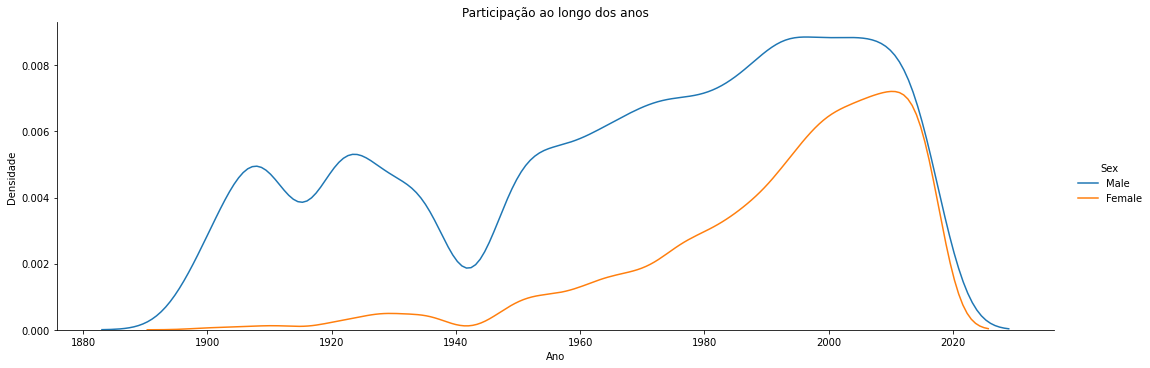

In [232]:
sns.displot(data=df, x="Year", kind='kde', hue='Sex', aspect=3)
plt.title('Participação ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Densidade')
plt.show()

Ao visualizar esse gráfico, percebe-se que as mulheres realmente não tinham uma participação expressiva nos jogos olímpicos antes de 1940. Além disso poucos dados foram registrados por volta de 1940, um provável motivo disso foi a segunda guerra mundial, mas não há como tirar conclusões somente com esses dados. 

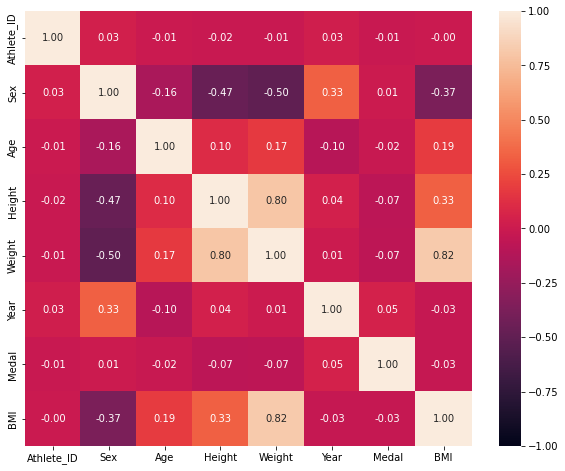

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_continuas.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

Não há correlações notórias além das mais óbvias: peso, altura e IMC; e o peso e a altura alterando conforme o gênero.

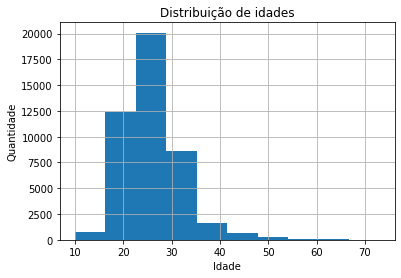

In [203]:
df['Age'].hist()
plt.title('Distribuição de idades')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

A faixa de idade que prevalece nas olimpíadas é entre 20 e 30 anos, algo esperado.

In [264]:
lista = df.dropna().groupby('Sport').mean().sort_values(by='Height')[:5]
lista.append(df.dropna().groupby('Sport').mean().sort_values(by='Height')[-5:])

---


,Athlete_ID,Age,Height,Weight,Year,BMI
Sport,,,,,,
Gymnastics,73027.643172,21.881938,161.426432,55.308811,1983.658150,21.042099
Diving,69892.544872,22.506410,165.974359,58.842949,1993.205128,21.212806
Trampolining,61457.551724,23.965517,166.310345,59.137931,2008.275862,21.263068
Weightlifting,76330.689524,25.045714,167.493333,81.277143,1986.262857,28.341230
Synchronized Swimming,73443.070000,23.690000,168.720000,56.220000,2003.880000,19.750081
Rowing,69258.470817,25.855545,184.747082,81.036965,1986.966926,23.547050
Water Polo,68508.867900,25.978864,185.620872,85.673712,1990.858653,24.740363
Beach Volleyball,72087.409091,29.545455,186.939394,79.848485,2006.303030,22.701178
Volleyball,74193.094828,25.846983,187.051724,79.840517,1990.150862,22.722263


Essa tabela mostra os cinco esportes com as menores alturas e os cinco esportes com as maiores alturas, uma curiosidade é que canoagem aparece com a quinta média mais alta.

In [265]:
lista = df.dropna().groupby('Sport').mean().sort_values(by='Weight')[:5]
lista.append(df.dropna().groupby('Sport').mean().sort_values(by='Weight')[-5:])

,Athlete_ID,Age,Height,Weight,Year,BMI
Sport,,,,,,
Rhythmic Gymnastics,68776.452991,18.931624,170.521368,49.290598,2004.410256,16.901055
Gymnastics,73027.643172,21.881938,161.426432,55.308811,1983.658150,21.042099
Synchronized Swimming,73443.070000,23.690000,168.720000,56.220000,2003.880000,19.750081
Diving,69892.544872,22.506410,165.974359,58.842949,1993.205128,21.212806
Trampolining,61457.551724,23.965517,166.310345,59.137931,2008.275862,21.263068
Tug-Of-War,70529.250000,24.875000,180.375000,83.000000,1906.000000,25.539963
Water Polo,68508.867900,25.978864,185.620872,85.673712,1990.858653,24.740363
Baseball,71066.427711,26.243976,182.463855,85.819277,2000.397590,25.746636
Basketball,67746.301328,25.270684,192.361593,87.005107,1988.061287,23.321080


Agora vemos a mesma abordagem, mas com pesos, algo curioso e fora do senso comum é que os atletas de bobsleigh possuem uma média de peso maior, e basquete vem em segundo lugar, muito por conta da altura dos atletas.

In [266]:
lista = df.dropna().groupby('Sport').mean().sort_values(by='BMI')[:5]
lista.append(df.dropna().groupby('Sport').mean().sort_values(by='BMI')[-5:])

,Athlete_ID,Age,Height,Weight,Year,BMI
Sport,,,,,,
Rhythmic Gymnastics,68776.452991,18.931624,170.521368,49.290598,2004.410256,16.901055
Synchronized Swimming,73443.070000,23.690000,168.720000,56.220000,2003.880000,19.750081
Ski Jumping,71915.988571,23.725714,177.262857,62.920000,1995.702857,20.020401
Triathlon,64101.392857,27.892857,175.178571,62.750000,2007.857143,20.344939
Figure Skating,73000.075314,24.196653,168.757322,60.598326,1990.610879,21.039790
Baseball,71066.427711,26.243976,182.463855,85.819277,2000.397590,25.746636
Rugby Sevens,70863.185714,25.371429,177.071429,81.814286,2016.000000,25.903409
Judo,73964.647399,25.273603,174.000000,80.359345,1997.071291,26.098893
Bobsleigh,70942.276596,29.336879,182.251773,90.124113,1989.964539,27.054778


Diferentemente do peso, quando analisamos o IMC, atletas de levantamento de peso apresentam a maior média.

In [267]:
lista = df.dropna().groupby('Sport').mean().sort_values(by='Age')[:5]
lista.append(df.dropna().groupby('Sport').mean().sort_values(by='Age')[-5:])

,Athlete_ID,Age,Height,Weight,Year,BMI
Sport,,,,,,
Rhythmic Gymnastics,68776.452991,18.931624,170.521368,49.290598,2004.410256,16.901055
Swimming,71990.124794,21.097611,181.283773,73.482084,1988.660626,22.227684
Gymnastics,73027.643172,21.881938,161.426432,55.308811,1983.658150,21.042099
Diving,69892.544872,22.506410,165.974359,58.842949,1993.205128,21.212806
Short Track Speed Skating,67570.640152,22.560606,169.840909,64.272727,2003.500000,22.214806
Shooting,67750.330841,30.297196,173.794393,75.005607,1990.930841,24.715829
Art Competitions,45215.000000,32.000000,174.000000,75.500000,1936.000000,24.950928
Curling,70176.716535,32.062992,174.393701,73.653543,2005.401575,24.092563
Golf,76412.250000,33.000000,179.750000,80.500000,2016.000000,24.965489


Ginástica rítmica é o esporte em que as pessoas tem uma menor media de idade, e hipismo apresenta a maior média de idade.
A seguir, vamos analisar esses mesmos dados de acordo com país.

In [268]:
lista = df.dropna().groupby('Team').mean().sort_values(by='Height')[:5]
lista.append(df.dropna().groupby('Team').mean().sort_values(by='Height')[-5:])

,Athlete_ID,Age,Height,Weight,Year,BMI
Team,,,,,,
Djinn,101089.000000,20.000000,158.000000,54.000000,1948.000000,21.631149
Eritrea,117747.000000,22.000000,160.000000,54.000000,2004.000000,21.093750
Indonesia,80000.166667,23.041667,161.791667,61.583333,2000.500000,23.478724
Kosovo,58601.000000,25.000000,162.000000,52.000000,2016.000000,19.814053
Bahrain,56126.000000,26.000000,162.333333,53.666667,2014.666667,20.311900
Sudan,52585.000000,23.000000,193.000000,72.000000,2008.000000,19.329378
Lithuania,78603.836066,27.065574,193.147541,94.311475,2001.245902,25.029727
Serbia and Montenegro,76924.803279,26.311475,194.459016,94.098361,1999.344262,24.835034
Netherlands-1,46793.000000,27.000000,202.500000,90.000000,2016.000000,21.958718


In [269]:
lista = df.dropna().groupby('Team').mean().sort_values(by='Weight')[:5]
lista.append(df.dropna().groupby('Team').mean().sort_values(by='Weight')[-5:])

,Athlete_ID,Age,Height,Weight,Year,BMI
Team,,,,,,
Elvis Va,18029.000000,43.000000,166.000000,51.000000,2008.000000,18.507766
Kosovo,58601.000000,25.000000,162.000000,52.000000,2016.000000,19.814053
Ethiopia,61187.693878,25.510204,166.040816,52.163265,2000.244898,18.865370
Bahrain,56126.000000,26.000000,162.333333,53.666667,2014.666667,20.311900
Mauritius,56253.000000,30.000000,175.000000,54.000000,2008.000000,17.632653
Fiji,88990.615385,25.692308,186.384615,96.461538,2016.000000,27.762742
Gabon,87690.000000,23.000000,190.000000,97.000000,2012.000000,26.869806
London City Police-1,8105.000000,30.000000,185.000000,99.000000,1908.000000,28.926224
Kathleen,101168.000000,42.000000,185.500000,104.500000,1956.000000,30.491197


In [270]:
lista = df.dropna().groupby('Team').mean().sort_values(by='BMI')[:5]
lista.append(df.dropna().groupby('Team').mean().sort_values(by='BMI')[-5:])

,Athlete_ID,Age,Height,Weight,Year,BMI
Team,,,,,,
Mauritius,56253.0,30.0,175.0,54.0,2008.0,17.632653
Guyana,4512.0,22.0,173.0,54.0,1980.0,18.042701
Elvis Va,18029.0,43.0,166.0,51.0,2008.0,18.507766
Botswana,3512.0,18.0,179.0,60.0,2012.0,18.726007
Afghanistan,86313.0,23.0,183.0,63.0,2010.0,18.812147
Lebanon,63849.0,28.0,173.5,87.5,1976.0,28.878260
London City Police-1,8105.0,30.0,185.0,99.0,1908.0,28.926224
Kuwait,1858.0,39.0,178.0,95.0,2006.0,29.983588
Kathleen,101168.0,42.0,185.5,104.5,1956.0,30.491197


In [271]:
lista = df.dropna().groupby('Team').mean().sort_values(by='Age')[:5]
lista.append(df.dropna().groupby('Team').mean().sort_values(by='Age')[-5:])

,Athlete_ID,Age,Height,Weight,Year,BMI
Team,,,,,,
Kurush II,26005.000000,16.0,175.000000,86.000000,1948.0,28.081633
Argonaut Rowing Club,118884.000000,18.0,185.000000,80.000000,1908.0,23.374726
Racing Club de France,98322.000000,18.0,166.000000,66.000000,1900.0,23.951227
Botswana,3512.000000,18.0,179.000000,60.000000,2012.0,18.726007
New York Athletic Club #1-1,25215.000000,19.0,183.000000,70.000000,1904.0,20.902386
Shrew II,68417.000000,45.0,186.500000,93.000000,1960.0,26.766043
Bonaparte,58624.000000,46.0,172.000000,63.000000,2008.0,21.295295
Clearwater,54460.000000,46.0,184.000000,70.000000,2008.0,20.675803
Ballerina IV,47555.666667,47.0,175.333333,76.666667,1960.0,24.990205
